In [15]:
from qiskit.transpiler.coupling import CouplingMap
def pretty_print(edge_list, simple=False):

    if simple:
        temp = list(edge_list)
        temp2 = []
        for (i,j) in temp:
            if not (j,i) in temp2:
                temp2.append((i,j))
        edge_list = temp2

    x = CouplingMap(edge_list)

    #black magic errors when I modify the draw function directly in the CouplingMap file so Im just copying the code here to make it work
    import pydot
    from PIL import Image
    import io
    formatter2 = lambda _: dict(dir="none")
    dot_str = x.graph.to_dot(edge_attr=formatter2, graph_attr={"size":"0"})
    dot = pydot.graph_from_dot_data(dot_str)[0]
    png = dot.create_png(prog="sfdp")
    pdf = dot.create_pdf(prog="sfdp")
    #png = dot.create_png(prog="neato")
    return Image.open(io.BytesIO(png))

In [12]:
def snail_to_connectivity(snail_edge_list):
    #Convert snail edge list where nodes are snails and edges are qubits
    #To connectivity edge list where nodes are qubits and edges are coupling
    edge_list = []

    #qubits are coupled to a snail edge if they are both adjacent to a snail node
    for qubit, snail_edge in enumerate(snail_edge_list):
        for temp_qubit, temp_snail_edge in enumerate(snail_edge_list):
            if qubit != temp_qubit and (snail_edge[0] in temp_snail_edge or snail_edge[1] in temp_snail_edge):
                edge_list.append((qubit, temp_qubit))
    return edge_list

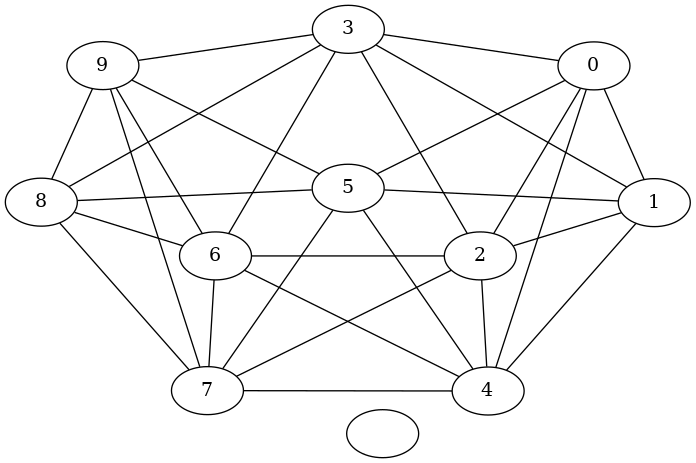

In [18]:
snail_edge_list = [(0,1), (0,1), (0,2), (0,3), (1,2), (1,4), (2,3), (2,4), (3,4), (3,4)]
pretty_print(snail_edge_list)

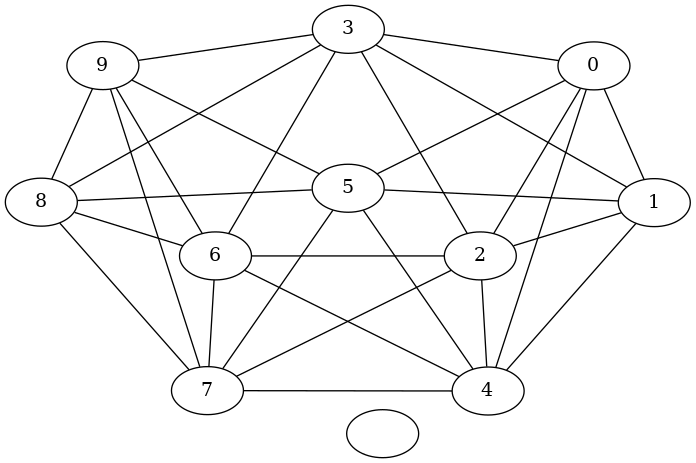

In [19]:
edge_list = snail_to_connectivity(snail_edge_list)
pretty_print(edge_list, simple=True)

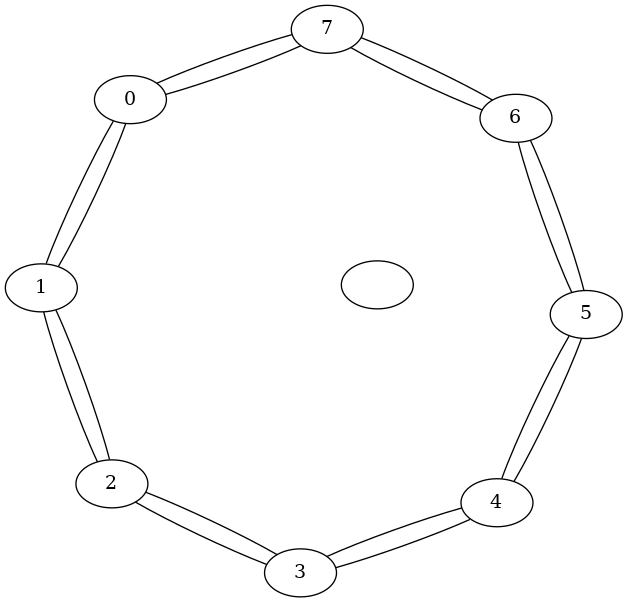

In [76]:
#define corral
def corral(skip_pattern):
    num_snails = 8
    num_levels = 2

    assert len(skip_pattern) == num_levels
    snail_edge_list = []
    for snail0, snail1 in zip(range(num_snails), range(1,num_snails+1)):
        for i in range(num_levels):
            snail_edge_list.append((snail0, (skip_pattern[i]+snail1)%num_snails))
    return snail_edge_list

snail_edge_list = corral((0,0))
pretty_print(snail_edge_list)

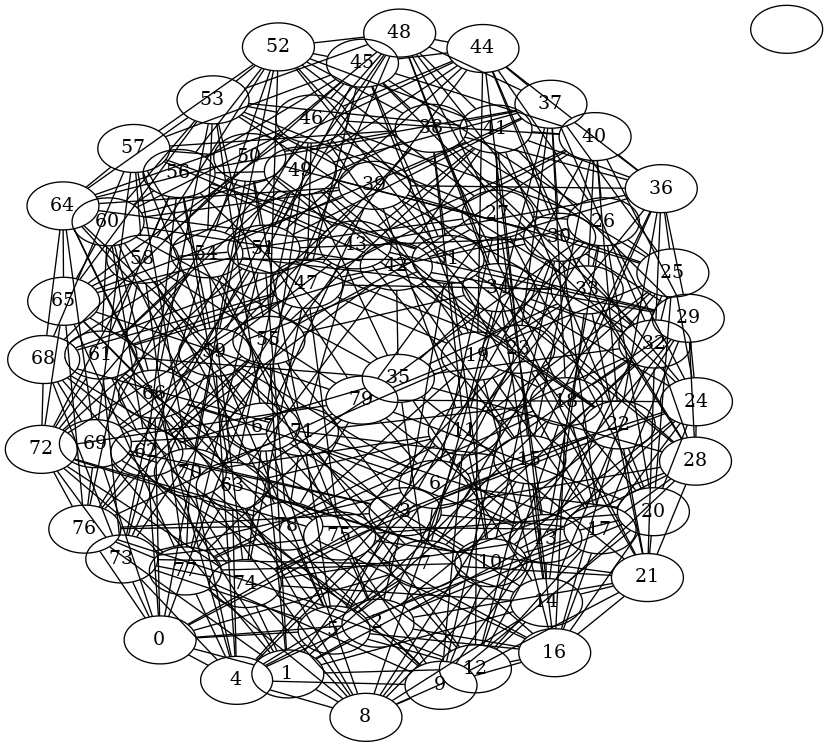

In [74]:
edge_list = snail_to_connectivity(snail_edge_list)
pretty_print(edge_list, simple=True)

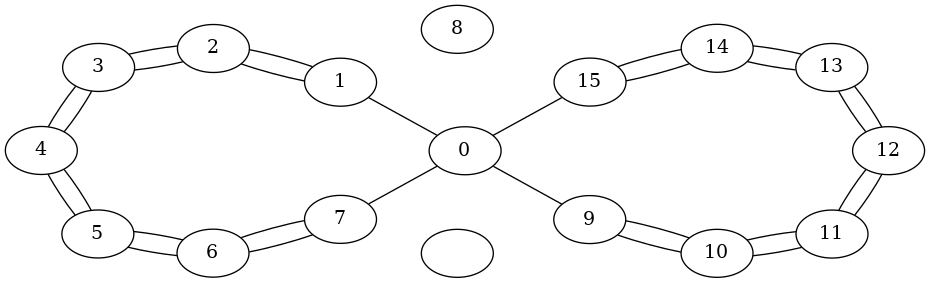

In [94]:
snail_edge_list = corral((0,0))
offset = 1+ max([el[1] for el in snail_edge_list])
snail_edge_list_2 = [(offset+el[0], offset+el[1]) for el in corral((0,0))]
pretty_print(snail_edge_list_2)

#delete edges
snail_edge_list.remove((7,0))
snail_edge_list.remove((0,1))
snail_edge_list_2.remove((15,8))
snail_edge_list_2.remove((8,9))

#joining edges
snail_edge_list = snail_edge_list + snail_edge_list_2
snail_edge_list = [(el[0], 0) if el[1] == 8 else (el[0], el[1]) for el in snail_edge_list ]
snail_edge_list = [(0, el[1]) if el[0] == 8 else (el[0], el[1]) for el in snail_edge_list ]
pretty_print(snail_edge_list)

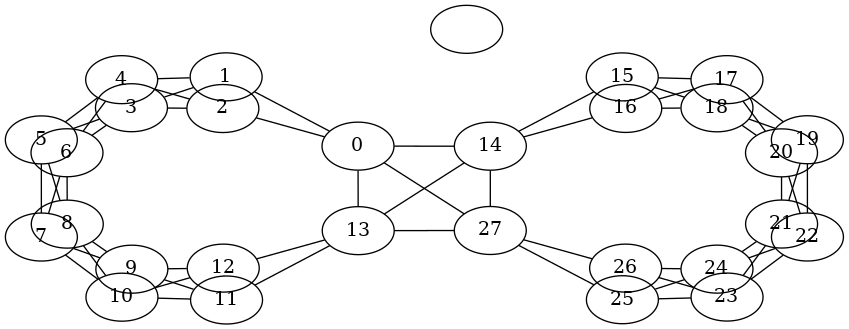

In [95]:
edge_list = snail_to_connectivity(snail_edge_list)
pretty_print(edge_list, simple=True)